# Model Conversion

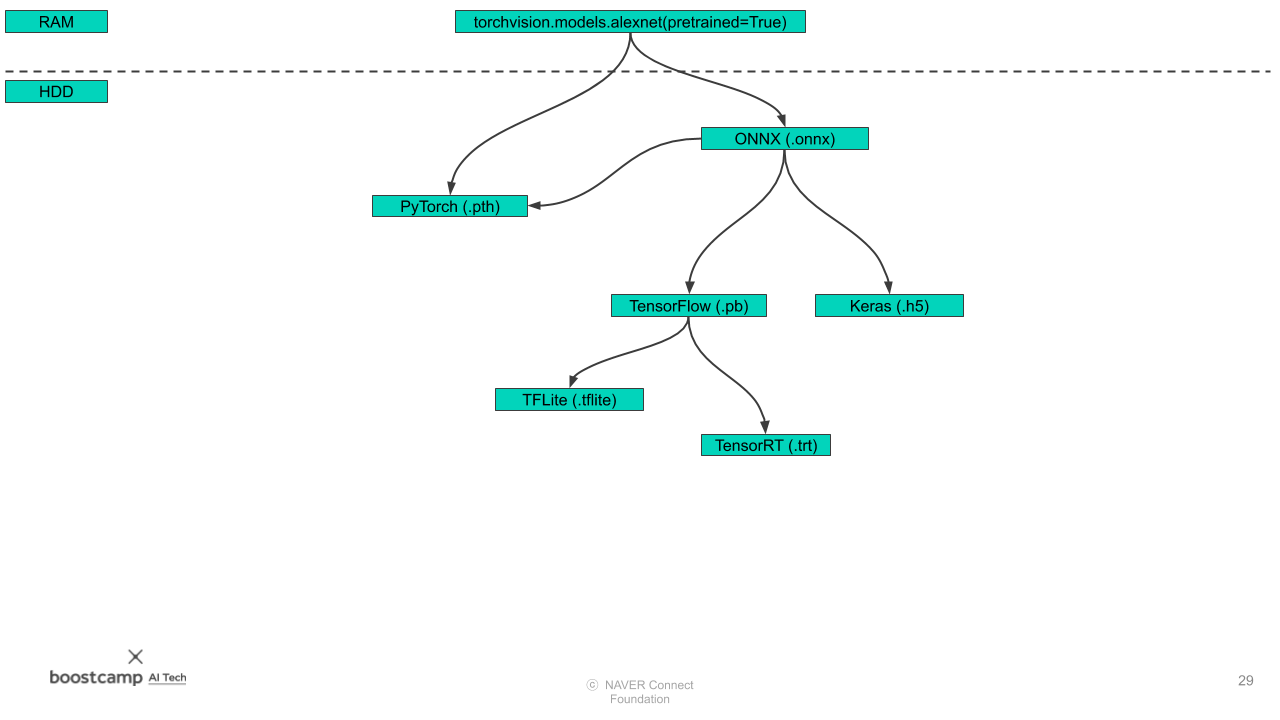

In [ ]:
!pip install onnx
!pip install onnx_tf
!pip install onnx2keras
!pip install pycuda

     |████████████████████████████████| 7.7MB 2.0MB/s 
     |████████████████████████████████| 215kB 15.5MB/s 
  Created wheel for onnx2keras: filename=onnx2keras-0.0.24-cp36-none-any.whl size=24580 sha256=07746517f4a5372d33858cd6f22a9908290ac252eac85b244316a549b0fdfd41
  Stored in directory: /root/.cache/pip/wheels/1d/d2/0a/8310ecf5f80355546fadda0fb4c611c8b54a63fce9af555155
Successfully built onnx2keras
     |████████████████████████████████| 1.6MB 25.6MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621122 sha256=05b89bdc6d206452f7c59fcb9df3f068204593449ae4b3c58800f019171726bc
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2021.1-py2.py3-none-any.whl size=60415 sha256=9871ebce1936d2251cd35f5f9f22da199390293cef222bb50a8c837bbd007bf3

In [ ]:
import torch
import torchvision
import onnx
from onnx_tf.backend import prepare
from onnx2keras import onnx_to_keras
import tensorflow as tf

dummy_input = torch.randn(10, 3, 224, 224, device='cuda')
model = torchvision.models.alexnet(pretrained=True).cuda()

input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]

# export torch (.pth)
torch.save(model, "alexnet.pth")

# export torch -> .onnx
torch.onnx.export(model, dummy_input, "alexnet.onnx", verbose=True, input_names=input_names, output_names=output_names)

# export onnx -> .pth
model = onnx.load("alexnet.onnx")
torch.save(model, "alexnet-onnx2pth.pth")

# export onnx -> tensorflow (.pb)
onnx_model = onnx.load("alexnet.onnx")  
output = prepare(onnx_model)
output.export_graph("alexnet.pb")

# export onnx -> keras (.h5)
onnx_model = onnx.load("alexnet.onnx")
k_model = onnx_to_keras(onnx_model, ['actual_input_1'])
k_model.save("alexnet.h5")

# export pb -> tensorflowlite (.tflite)
converter = tf.lite.TFLiteConverter.from_saved_model("alexnet.pb")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_model = converter.convert()
open('alexnet.tflite', 'wb').write(tf_lite_model)

# export pb -> tensorrt (.trt)
params = tf.experimental.tensorrt.ConversionParams(
    precision_mode='FP16')
converter = tf.experimental.tensorrt.Converter(
    input_saved_model_dir="alexnet.pb", conversion_params=params)
converter.convert()
converter.save("alexnet.trt")

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



graph(%actual_input_1 : Float(10:150528, 3:50176, 224:224, 224:1, requires_grad=0, device=cuda:0),
      %learned_0 : Float(64:363, 3:121, 11:11, 11:1, requires_grad=1, device=cuda:0),
      %learned_1 : Float(64:1, requires_grad=1, device=cuda:0),
      %learned_2 : Float(192:1600, 64:25, 5:5, 5:1, requires_grad=1, device=cuda:0),
      %learned_3 : Float(192:1, requires_grad=1, device=cuda:0),
      %learned_4 : Float(384:1728, 192:9, 3:3, 3:1, requires_grad=1, device=cuda:0),
      %learned_5 : Float(384:1, requires_grad=1, device=cuda:0),
      %learned_6 : Float(256:3456, 384:9, 3:3, 3:1, requires_grad=1, device=cuda:0),
      %learned_7 : Float(256:1, requires_grad=1, device=cuda:0),
      %learned_8 : Float(256:2304, 256:9, 3:3, 3:1, requires_grad=1, device=cuda:0),
      %learned_9 : Float(256:1, requires_grad=1, device=cuda:0),
      %learned_10 : Float(4096:9216, 9216:1, requires_grad=1, device=cuda:0),
      %learned_11 : Float(4096:1, requires_grad=1, device=cuda:0),
     

INFO:tensorflow:Assets written to: alexnet.pb/assets


INFO:tensorflow:Assets written to: alexnet.pb/assets


INFO:tensorflow:Linked TensorRT version: (0, 0, 0)


INFO:tensorflow:Linked TensorRT version: (0, 0, 0)


INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)


INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)


INFO:tensorflow:Assets written to: alexnet.trt/assets


INFO:tensorflow:Assets written to: alexnet.trt/assets


### 모델 크기 큰 순서로 나열해보기

In [ ]:
print(squeezenet)
print(ts(squeezenet.cuda(), input_size=(3, 224, 224)))
print(ts(mobilenet.cuda(), input_size=(3, 224, 224)))
print(ps(squeezenet.cuda(), torch.zeros(1, 3, 256, 256).cuda(), show_input=True)) # Try show_input=False

NameError: ignored